In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("covid_19_data.csv")

In [7]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [9]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [10]:
data.isnull().any()

SNo                False
ObservationDate    False
Province/State      True
Country/Region     False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

In [13]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data['year'] = data["ObservationDate"].dt.year

Relationship between Confirmed and Recovered; whether people are recovering well or not

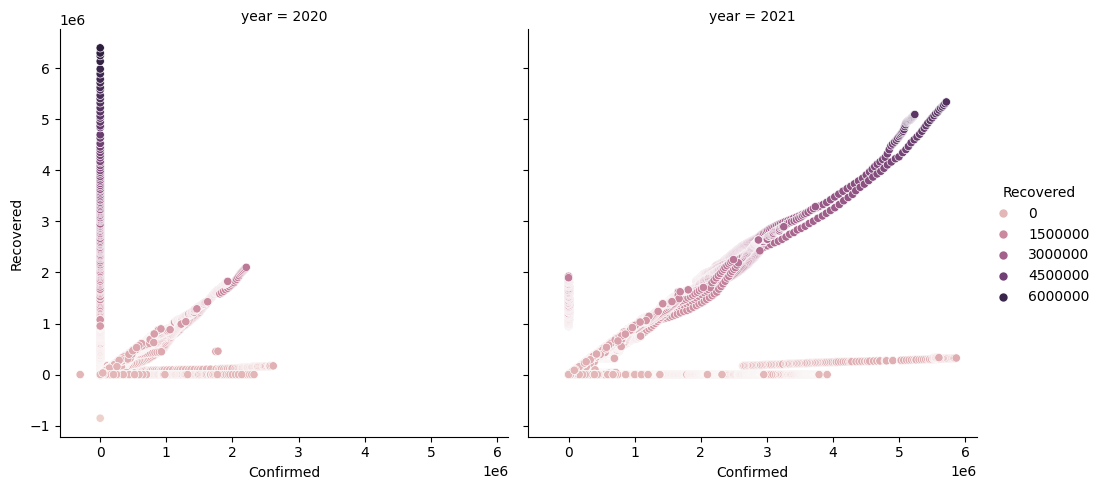

In [25]:
sns.relplot(x="Confirmed", y="Recovered", data=data, kind="scatter", col="year", hue="Recovered")
plt.show()

Finding which Country has more number of death in calculation

In [15]:
data.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'year'],
      dtype='object')

In [20]:
suffered_country = data.groupby("Country/Region")["Deaths"].sum().reset_index()
suffered_country

,Country/Region,Deaths
0,Azerbaijan,0.0
1,"('St. Martin',)",0.0
2,Afghanistan,669075.0
3,Albania,375955.0
4,Algeria,834464.0
...,...,...
224,West Bank and Gaza,440378.0
225,Yemen,237613.0
226,Zambia,205990.0
227,Zimbabwe,237234.0


In [21]:
max_death_country = suffered_country.loc[suffered_country["Deaths"].idxmax()]
max_death_country

Country/Region             US
Deaths            123303762.0
Name: 214, dtype: object

Finding which Country has less number of death in calculation

In [26]:
less_death_country = data.groupby("Country/Region")["Deaths"].sum().reset_index()
less_death_country

,Country/Region,Deaths
0,Azerbaijan,0.0
1,"('St. Martin',)",0.0
2,Afghanistan,669075.0
3,Albania,375955.0
4,Algeria,834464.0
...,...,...
224,West Bank and Gaza,440378.0
225,Yemen,237613.0
226,Zambia,205990.0
227,Zimbabwe,237234.0


In [27]:
min_death_in_country = less_death_country.loc[less_death_country["Deaths"].idxmin()]
min_death_in_country

Country/Region     Azerbaijan
Deaths                    0.0
Name: 0, dtype: object

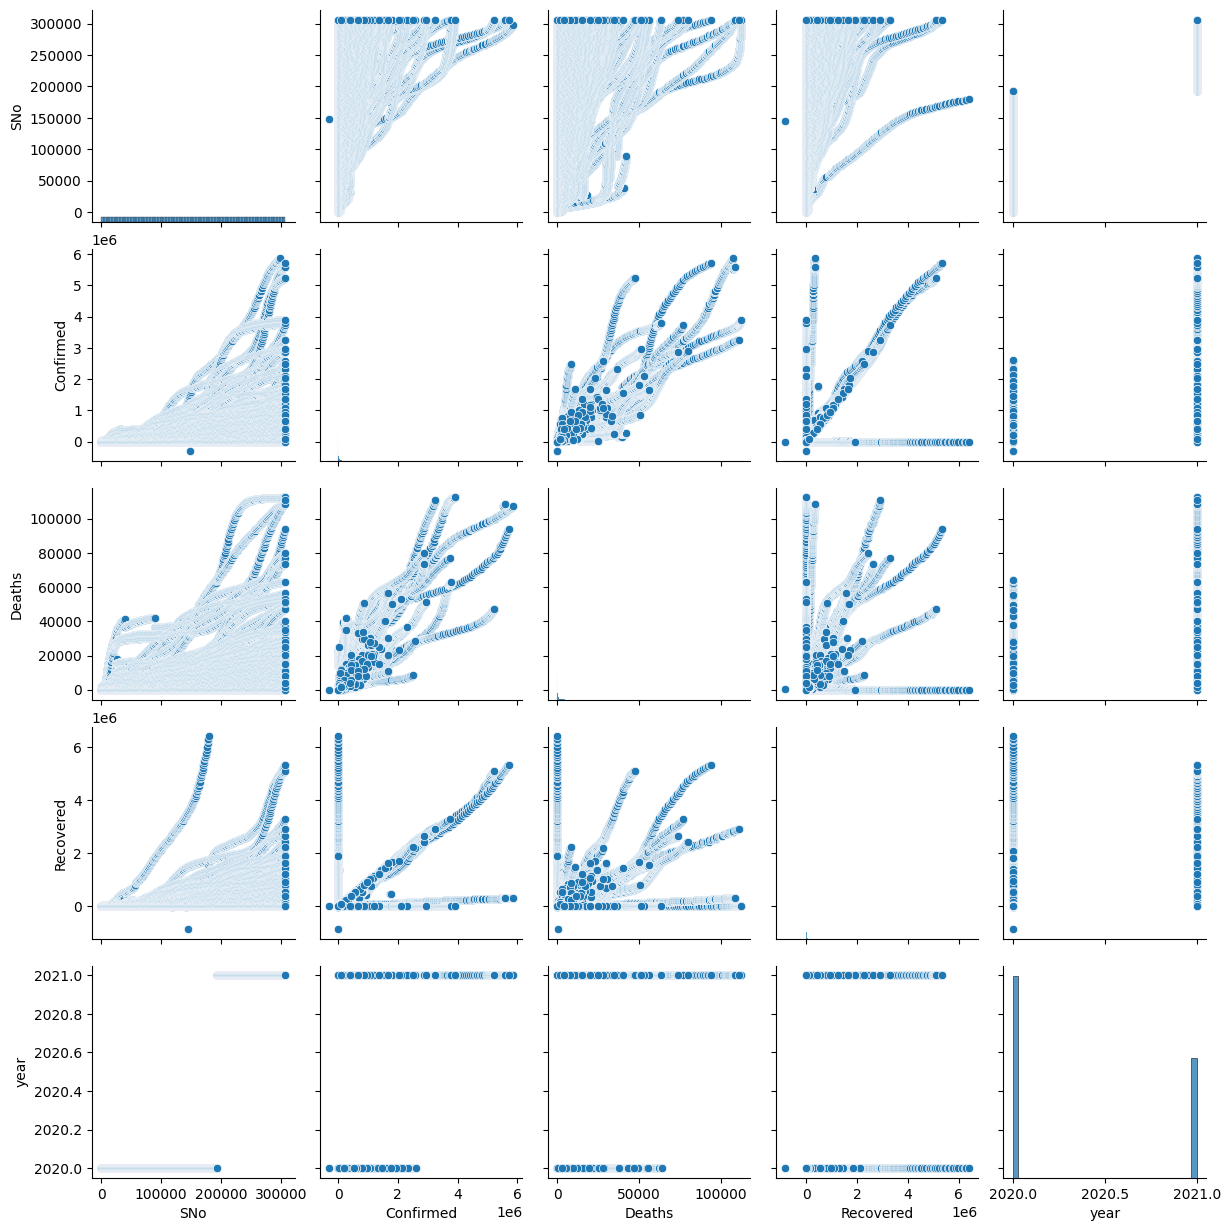

In [28]:
sns.pairplot(data)